In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# https://www.kaggle.com/code/mgmarques/wines-type-and-quality-classification-exercises/notebook

# great EDA that is too large to start now, but great cheat sheet for future

In [2]:
# https://www.kaggle.com/code/gabenazario/wine-quality-classification-rdm-forest-keras

#data = pd.read_csv("~/datacsv/Churn_Modelling.csv")
df_red = pd.read_csv("~/datacsv/winequality-red.csv", sep=',')   #red wine UCI dataset
df_white = pd.read_csv("~/datacsv/winequality-white.csv", sep=';')   #red wine UCI dataset

In [3]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df_red.shape

(1599, 12)

In [6]:
df_white.shape

(4898, 12)

In [7]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#df_white.info()

In [9]:
#df_red.isnull().sum()

In [10]:
#df_white.isnull().sum()

In [11]:
#data1=data.dropna()

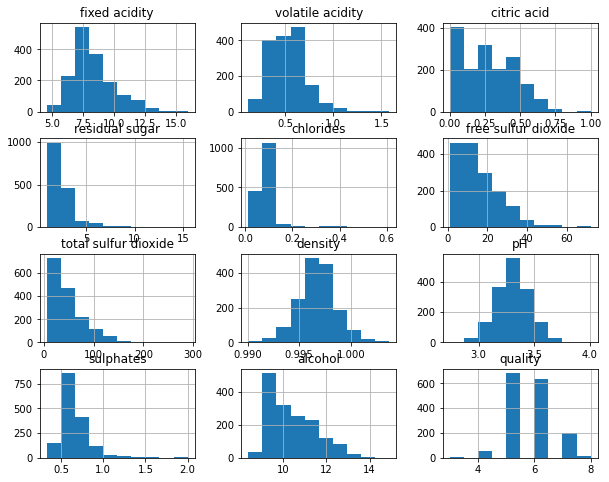

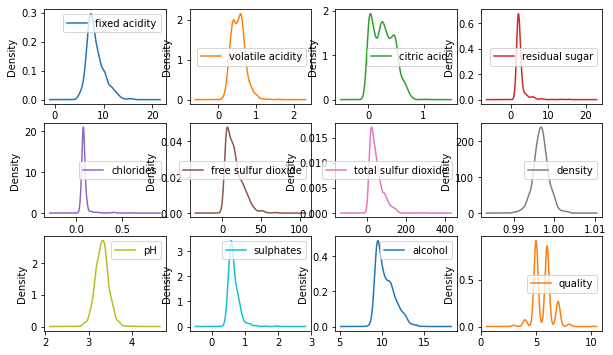

In [12]:
# Histograms
df_red.hist(bins=10,figsize=(10, 8))
plt.show()
# Density
df_red.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10, 8))
plt.show()

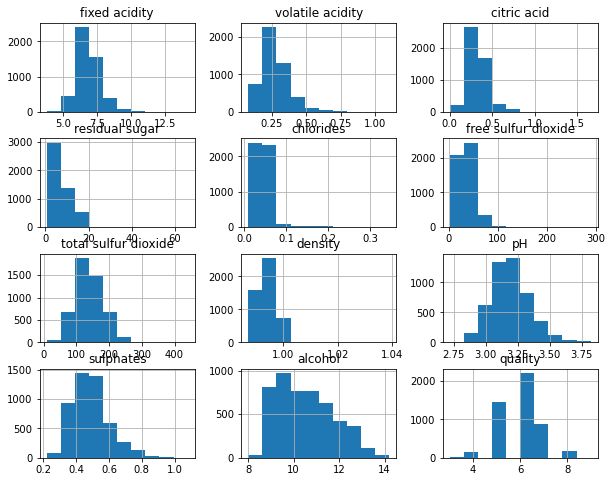

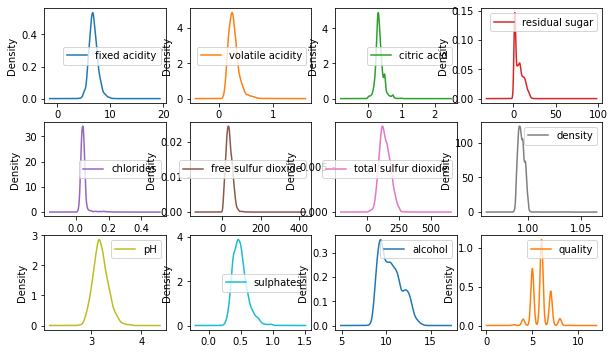

In [13]:
# Histograms
df_white.hist(bins=10,figsize=(10, 8))
plt.show()
# Density
df_white.plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(10, 8))
plt.show()

In [14]:
# Add `type` column to `red` with price one
df_red['type'] = 1
 
# Add `type` column to `white` with price zero
df_white['type'] = 0
 
# Concat `white` to `red`
#pd.concat([df1,df2], ignore_index=True)

wines = pd.concat([df_red, df_white], ignore_index=True)
 
## Import `train_test_split` from `sklearn.model_selection`
#from sklearn.model_selection import train_test_split
#X = wines.ix[:, 0:11]
#y = np.ravel(wines.type)
 

In [15]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [16]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [17]:
x = wines.iloc[:,0:12].values
y = wines.iloc[:,12].values

In [18]:
x

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [19]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [20]:
df_red.quality.unique()    #3,4,5,6,7,8.  - so there are 6 quality levels/labels

array([5, 6, 7, 4, 8, 3])

In [21]:
df_white.quality.unique()   # 3,4,5,6,7,8,9

array([6, 5, 7, 8, 4, 3, 9])

In [22]:
x.shape

(6497, 12)

In [23]:
x

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [24]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

In [26]:
x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

In [27]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
x_train1 = mc.fit_transform( x_train)
X_test1 = mc.fit_transform( x_test)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

from keras.callbacks import EarlyStopping

In [29]:
# Initialize the model
model=Sequential()

# Build input layer & Hidden layer
model.add(Dense(units=96, activation='relu', input_dim=12))
model.add(Dropout(rate=0.1))


In [30]:
# Building second layer
model.add(Dense(units=48,activation ='relu'))
model.add(Dropout(rate=0.1))

In [31]:
# Building 3rd layer
model.add(Dense(units=24,activation ='relu'))
model.add(Dropout(rate=0.1))

In [32]:
# Building 4th layer
model.add(Dense(units=12,activation ='relu'))
model.add(Dropout(rate=0.1))

In [33]:
#Adding outer layer
model.add(Dense(units = 1, activation='sigmoid'))


In [34]:
# compile the model
#model.compile(optimizer='adam', loss='mae')  
#model.compile(loss='mae', optimizer = 'adam', metrics=['accuracy'])

In [35]:
# Model output shape
model.output_shape
 
# Model summary
model.summary()
 
# Model config
model.get_config()
 
# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy',optimizer ='adam', metrics =['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1248      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                4656      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_3 (Dense)             (None, 12)                3

In [36]:
#Fit model:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_minitor = EarlyStopping(patience=100)

#train model:   Test accuracy: 0.590625   epochs=300
history = model.fit(x_train, y_train,
 epochs=300,
 batch_size=32,
 validation_split=0.2,
 callbacks=[early_stopping_minitor])

Epoch 1/300
130/130 [==============================] - 1s 2ms/step - loss: 0.5306 - accuracy: 0.7503 - val_loss: 0.3197 - val_accuracy: 0.8615
Epoch 2/300
130/130 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8694 - val_loss: 0.2039 - val_accuracy: 0.9404
Epoch 3/300
130/130 [==============================] - 0s 1ms/step - loss: 0.2540 - accuracy: 0.9146 - val_loss: 0.1744 - val_accuracy: 0.9404
Epoch 4/300
130/130 [==============================] - 0s 1ms/step - loss: 0.2423 - accuracy: 0.9204 - val_loss: 0.1920 - val_accuracy: 0.9346
Epoch 5/300
130/130 [==============================] - 0s 1ms/step - loss: 0.2280 - accuracy: 0.9247 - val_loss: 0.1800 - val_accuracy: 0.9413
Epoch 6/300
130/130 [==============================] - 0s 1ms/step - loss: 0.2160 - accuracy: 0.9338 - val_loss: 0.1690 - val_accuracy: 0.9442
Epoch 7/300
130/130 [==============================] - 0s 1ms/step - loss: 0.2143 - accuracy: 0.9331 - val_loss: 0.1679 - val_accuracy: 0.9433

In [37]:
y_pred = model.predict(x_test)


41/41 [==============================] - 0s 563us/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


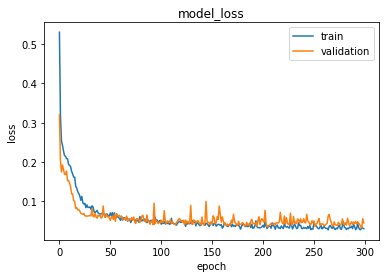

In [38]:
# Plot loss of train and test set
print(history.history.keys())

#Loss in train and test:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [39]:
#y_pred = y_pred.round()

In [40]:
#y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.81815343e-03 0.00000000e+00]
 [2.81333942e-05 0.00000000e+00]
 [1.43455749e-04 0.00000000e+00]
 ...
 [4.27107047e-03 0.00000000e+00]
 [2.74055375e-04 0.00000000e+00]
 [7.23576304e-05 0.00000000e+00]]


In [41]:
y_pred = y_pred.round()

In [42]:
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)


[[993   4]
 [  7 296]]


In [43]:
accuracy_score(y_test, y_pred)

0.9915384615384616

In [44]:
print('Test accuracy:', accuracy_score(y_test, y_pred))

Test accuracy: 0.9915384615384616
